In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
train_df = pd.read_csv('fashion-mnist_train.csv')
test_df = pd.read_csv('fashion-mnist_test.csv')

In [ ]:
train_df.shape



(17040, 785)

In [ ]:
test_df.shape

(10000, 785)

In [ ]:
train_df.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,17040.000000,17040.000000,17040.000000,17040.000000,17040.000000,17040.000000,17040.000000,17040.000000,17040.000000,17040.000000,...,17039.000000,17039.000000,17039.000000,17039.000000,17039.000000,17039.000000,17039.000000,17039.000000,17039.000000,17039.000000
mean,4.486913,0.002347,0.005869,0.028991,0.114495,0.233275,0.372946,0.725352,2.167077,5.751995,...,34.590997,23.532308,16.799519,17.331886,22.342332,17.985328,8.849111,2.964435,0.961265,0.088738
std,2.881984,0.172991,0.209439,0.621885,2.630319,4.060619,5.337305,7.395038,13.906113,24.238699,...,57.409471,48.730232,41.825340,43.064804,51.111173,45.379001,30.228846,18.003959,9.866697,2.342414
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,58.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9.000000,16.000000,16.000000,56.000000,164.000000,217.000000,230.000000,213.000000,218.000000,254.000000,...,254.000000,255.000000,254.000000,255.000000,252.000000,255.000000,250.000000,255.000000,255.000000,170.000000


In [ ]:
train_df.label.unique()

array([2, 9, 6, 0, 3, 4, 5, 8, 7, 1])

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


Convert each image of 784 into (28x28x1)(height x width x color_channels). Divide values by 255 to scale the values

In [ ]:
# Preprocessing
x_train = train_df.iloc[:, 1:].to_numpy().reshape(-1, 28, 28, 1) / 255.0
y_train = train_df.iloc[:, 0].to_numpy()

In [ ]:
x_test = test_df.iloc[:, 1:].to_numpy().reshape(-1, 28, 28, 1) / 255.0
y_test = test_df.iloc[:, 0].to_numpy()

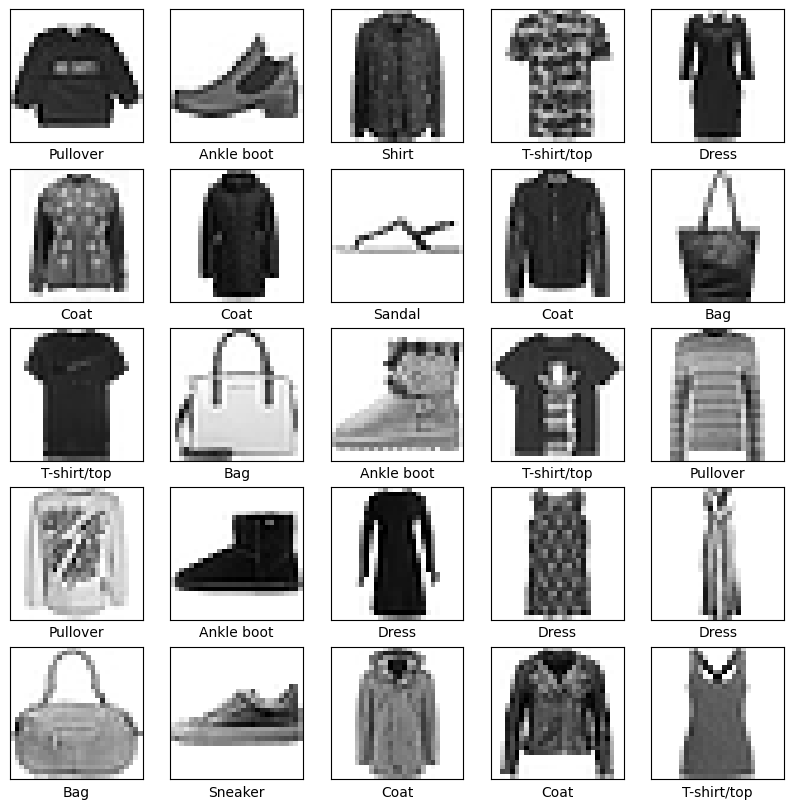

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()


In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Flatten,MaxPooling2D,Dropout

In [ ]:
# Build CNN model
model = Sequential([
    Conv2D(128, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.3),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')  # ✅ Correct activation for multiclass
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 128)    │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 13, 13, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 21632)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     2,769,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,771,594 (10.57 MB)

 Trainable params: 2,771,594 (10.57 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(x_train,y_train,epochs=10,batch_size=1200,validation_split=0.05)

Epoch 1/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 32s 2s/step - accuracy: 0.5263 - loss: 1.4776 - val_accuracy: 0.7512 - val_loss: nan
Epoch 2/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 32s 2s/step - accuracy: 0.7950 - loss: 0.5831 - val_accuracy: 0.8110 - val_loss: nan
Epoch 3/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.8349 - loss: 0.4634 - val_accuracy: 0.8392 - val_loss: nan
Epoch 4/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.8535 - loss: 0.4095 - val_accuracy: 0.8404 - val_loss: nan
Epoch 5/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.8649 - loss: 0.3719 - val_accuracy: 0.8439 - val_loss: nan
Epoch 6/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.8696 - loss: 0.3552 - val_accuracy: 0.8592 - val_loss: nan
Epoch 7/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 30s 2s/step - accuracy: 0.8758 - loss: 0.3520 - val_accuracy: 0.8709 - val_loss: nan
Epoch 8/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.8866 - loss: 0.3190 - val_accuracy: 0.8732 - val_loss: nan
Epoch 9/10
14/14

In [ ]:
evaluation = model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8768 - loss: 0.3444


In [ ]:
print(f"Accuracy: {evaluation[1]}")

Accuracy: 0.8820000290870667


In [ ]:
y_probas = model.predict(x_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step


y_probas contains 10 columns with 9 columns of catergory ,using argmax function we select column with maximum value

In [ ]:
y_pred = y_probas.argmax(axis=-1)


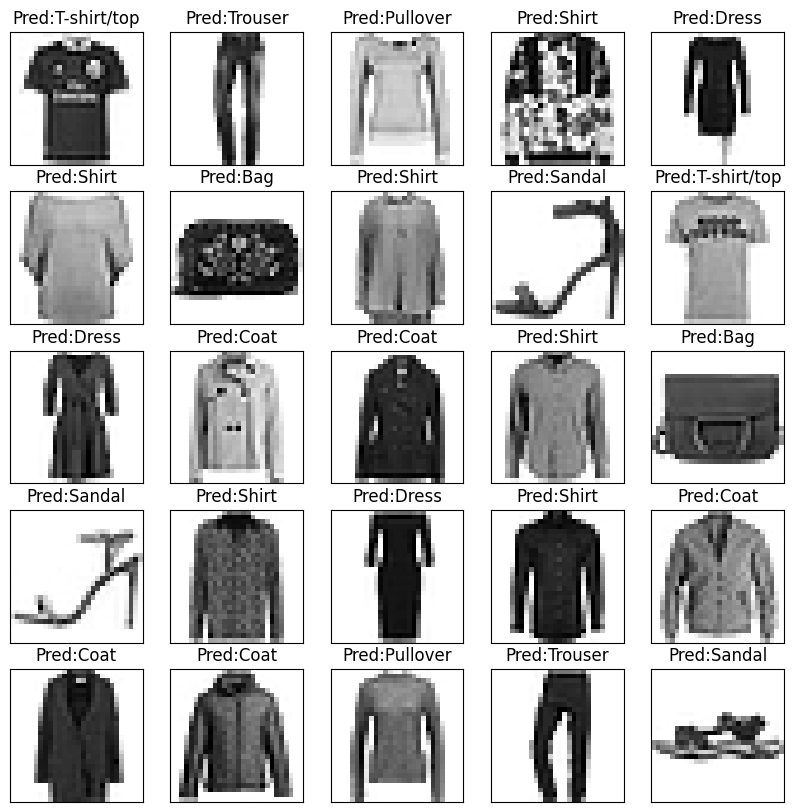

In [ ]:
plt.figure(figsize=(10,10),)
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    plt.title(f"Pred:{class_names[y_pred[i]]}")
plt.show()
